# Samraddhi_Time_Series_Project_final_done

## Project:: Forcasting the Furniture Sales

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data

This dataset consists of daily sales data of various products at a superstore.
We will need to apply Time Series (ARIMA) to build model to predict and forecast the sales of furniture for the next one year i.e. predict future values based on previously observed values. We have a 4-year furniture sales data.

##### Data Preparation
We remove unwanted columns that is not needed and check missing values. Aggregate sales data by date and finally index it with the time series data.

##### Feature Engineering
We check the stationarity of the data and decide the next step to be taken. Also decompose the data for further clarification and apply the time series model on the data.

##### Model Comparison
We perform parameter selection to find optimal set of parameters that yields the best performance for the model.

##### Model Selection
We compare predicted value to the real values and set the forecast from the start to the end of the data.

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

#### Reading the Time Series Data

In [3]:
#read the dataset
furniture = pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls", index_col='Order Date', parse_dates=True)

In [4]:
furniture

Row ID        Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                                  
2016-11-08       1  CA-2016-152156 2016-11-11    Second Class    CG-12520   
2016-11-08       2  CA-2016-152156 2016-11-11    Second Class    CG-12520   
2016-06-12       3  CA-2016-138688 2016-06-16    Second Class    DV-13045   
2015-10-11       4  US-2015-108966 2015-10-18  Standard Class    SO-20335   
2015-10-11       5  US-2015-108966 2015-10-18  Standard Class    SO-20335   
...            ...             ...        ...             ...         ...   
2014-01-21    9990  CA-2014-110422 2014-01-23    Second Class    TB-21400   
2017-02-26    9991  CA-2017-121258 2017-03-03  Standard Class    DB-13060   
2017-02-26    9992  CA-2017-121258 2017-03-03  Standard Class    DB-13060   
2017-02-26    9993  CA-2017-121258 2017-03-03  Standard Class    DB-13060   
2017-05-04    9994  CA-2017-119914 2017-05-09    Second Class    CC-12220   

               Customer Name    Segment        Country             City  \
Order Date                                                                
2016-11-08       Claire Gute   Consumer  United States        Henderson   
2016-11-08       Claire Gute   Consumer  United States        Henderson   
2016-06-12   Darrin Van Huff  Corporate  United States      Los Angeles   
2015-10-11    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
2015-10-11    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...                      ...        ...            ...              ...   
2014-01-21  Tom Boeckenhauer   Consumer  United States            Miami   
2017-02-26       Dave Brooks   Consumer  United States       Costa Mesa   
2017-02-26       Dave Brooks   Consumer  United States       Costa Mesa   
2017-02-26       Dave Brooks   Consumer  United States       Costa Mesa   
2017-05-04      Chris Cortes   Consumer  United States      Westminster   

                 State  Postal Code Region       Product ID         Category  \
Order Date                                                                     
2016-11-08    Kentucky        42420  South  FUR-BO-10001798        Furniture   
2016-11-08    Kentucky        42420  South  FUR-CH-10000454        Furniture   
2016-06-12  California        90036   West  OFF-LA-10000240  Office Supplies   
2015-10-11     Florida        33311  South  FUR-TA-10000577        Furniture   
2015-10-11     Florida        33311  South  OFF-ST-10000760  Office Supplies   
...                ...          ...    ...              ...              ...   
2014-01-21     Florida        33180  South  FUR-FU-10001889        Furniture   
2017-02-26  California        92627   West  FUR-FU-10000747        Furniture   
2017-02-26  California        92627   West  TEC-PH-10003645       Technology   
2017-02-26  California        92627   West  OFF-PA-10004041  Office Supplies   
2017-05-04  California        92683   West  OFF-AP-10002684  Office Supplies   

           Sub-Category                                       Product Name  \
Order Date                                                                   
2016-11-08    Bookcases                  Bush Somerset Collection Bookcase   
2016-11-08       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2016-06-12       Labels  Self-Adhesive Address Labels for Typewriters b...   
2015-10-11       Tables      Bretford CR4500 Series Slim Rectangular Table   
2015-10-11      Storage                     Eldon Fold 'N Roll Cart System   
...                 ...                                                ...   
2014-01-21  Furnishings                             Ultra Door Pull Handle   
2017-02-26  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   
2017-02-26       Phones                              Aastra 57i VoIP phone   
2017-02-26        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   
2017-05-04   Appliances  Acco 7-Outlet Masterpiece Power 

##### we have a good 4-years furniture sales data.

In [5]:
#Checking the dimension of the time series data
furniture.shape

(9994, 20)

In [6]:
#Info command to have a glance on the data types and the missing values
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Pro

In [7]:
print("structure of the dataset:", furniture.shape)

structure of the dataset: (9994, 20)


In [8]:
furniture.describe() #data description

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

#### Data Preprocessing
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [9]:
furniture['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [10]:
furniture_new = furniture.loc[furniture['Category'] == 'Furniture']
furniture_new.head(2)

Row ID        Order ID  Ship Date     Ship Mode Customer ID  \
Order Date                                                                
2016-11-08       1  CA-2016-152156 2016-11-11  Second Class    CG-12520   
2016-11-08       2  CA-2016-152156 2016-11-11  Second Class    CG-12520   

           Customer Name   Segment        Country       City     State  \
Order Date                                                               
2016-11-08   Claire Gute  Consumer  United States  Henderson  Kentucky   
2016-11-08   Claire Gute  Consumer  United States  Henderson  Kentucky   

            Postal Code Region       Product ID   Category Sub-Category  \
Order Date                                                                
2016-11-08        42420  South  FUR-BO-10001798  Furniture    Bookcases   
2016-11-08        42420  South  FUR-CH-10000454  Furniture       Chairs   

                                                 Product Name   Sales  \
Order Date                                                              
2016-11-08                  Bush Somerset Collection Bookcase  261.96   
2016-11-08  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94   

            Quantity  Discount    Profit  
Order Date                                
2016-11-08         2       0.0   41.9136  
2016-11-08         3       0.0  219.5820

In [11]:
from pandas_profiling import ProfileReport

In [12]:
profile = ProfileReport(furniture_new, title="Pandas Profiling Report")

In [13]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
df = furniture_new.groupby(['Order Date'])['Sales'].sum()

### EDA 

### Product Category Distribution

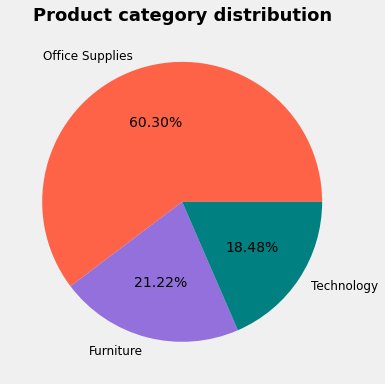

In [15]:
plt.figure(figsize=(15,6))
percentage = furniture['Category'].value_counts()         
labels = list(furniture['Category'].value_counts().index)
color = ['tomato','mediumpurple','teal']
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",colors=color)
plt.title('Product category distribution',fontweight='bold',fontsize=18)
plt.show()

### Interpretation::::

The products are divided into 3 categories of which the largest data is of office supplies category and lowest is of technology.

### Category Wise Sales and Category Wise profit

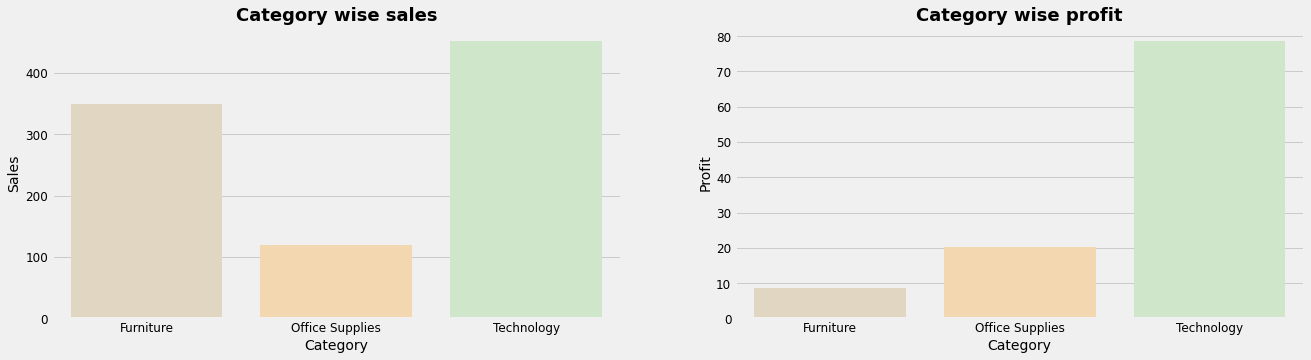

In [16]:
plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.title("Category wise sales",fontweight='bold',fontsize=18)
sns.barplot(y=furniture['Sales'], x=furniture['Category'],palette='Pastel1_r',ci=None)

plt.subplot(1,2,2)
plt.title("Category wise profit",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Category'], y=furniture['Profit'],palette='Pastel1_r',ci=None)

plt.show()

### Interpretation::::
Technology category has the highest number of sales and profit.
Office supplies has less number of profit and sales  and furniture category has least number of profit, also we can see that sales of profit is good but we are not getting profit acc to our sales , also we can say that in office supplies we have somewhere equall sales and profit .

### Segment Wise Sales  and  Segment Wise Profit

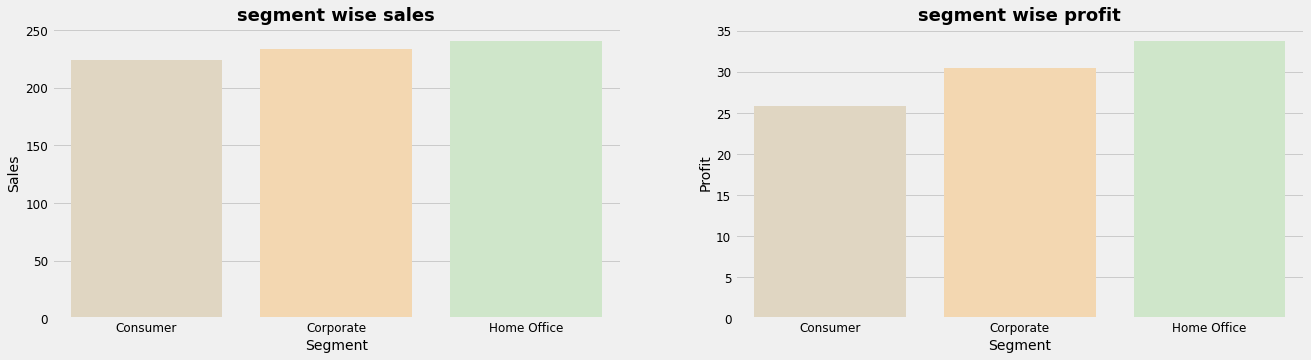

In [17]:
plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.title("segment wise sales",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Segment'], y=furniture['Sales'],palette='Pastel1_r',ci=None)

plt.subplot(1,2,2)
plt.title("segment wise profit",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Segment'], y=furniture['Profit'],palette='Pastel1_r',ci=None)

plt.show()

### Interpretation :::

Sales and profit are higher in Home-office segment and less in consumer segement.

### Sales vs Region

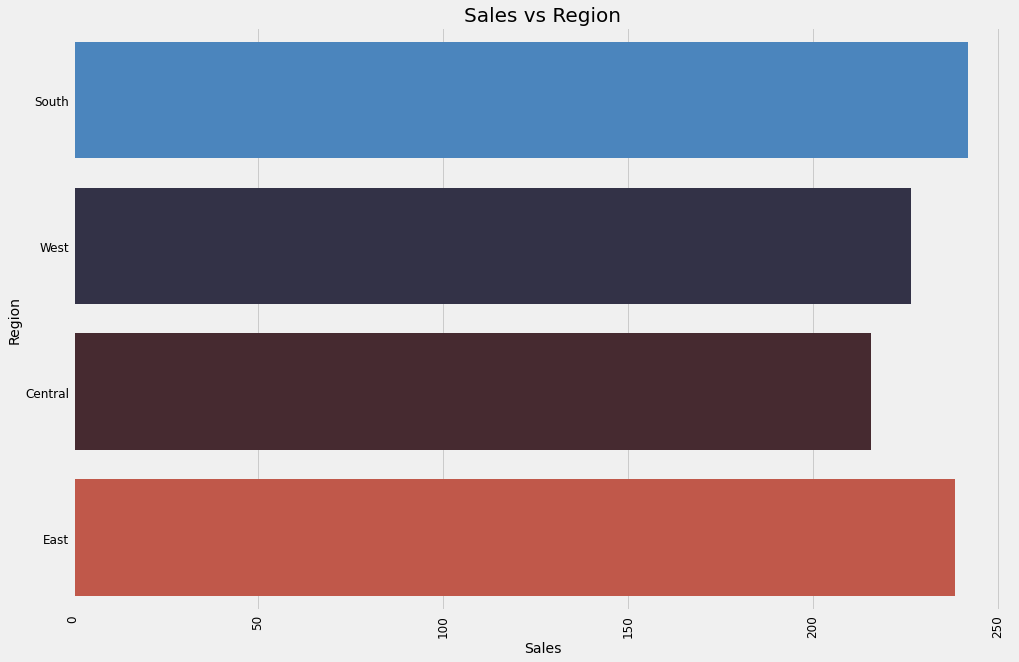

In [108]:
plt.figure(figsize=(15,10))
# Passing X axis and Y axis along with subplot position
plt.title('Sales vs Region', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = furniture['Sales'] , y = furniture['Region'] , palette='icefire',ci=0);

#### Interpretation::::
Here we can see that we have highest sales at south region .

#### Region wise profit

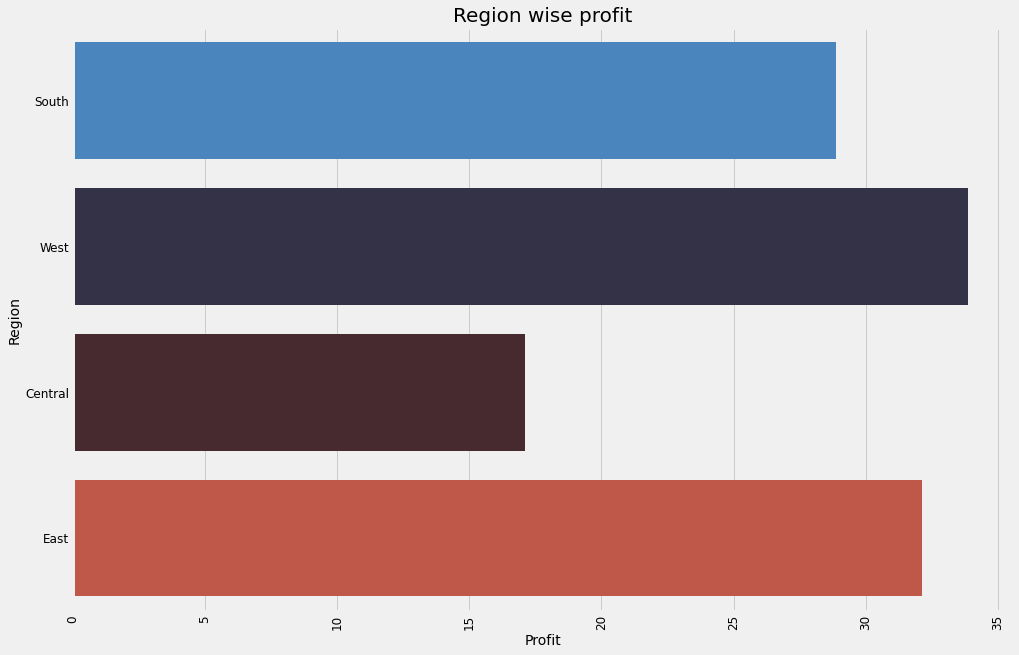

In [132]:
plt.figure(figsize=(15,10))
# Passing X axis and Y axis along with subplot position
plt.title('Region wise profit', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = furniture['Profit'] , y = furniture['Region'] , palette='icefire',ci=0);

#### Interpretation ::::
After seeing both region wise sales and profit we can say that we are geeting highest sales from south and east region and least was from central , but profit we are getting highest from west region also a good profit from east region .

#### Region wise discount

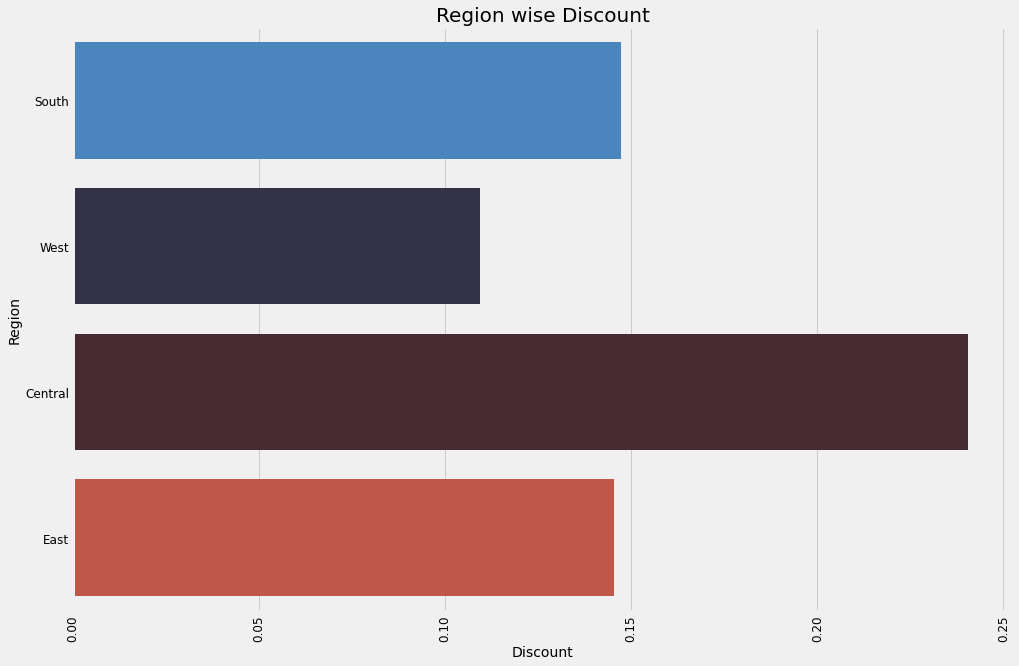

In [134]:
plt.figure(figsize=(15,10))
# Passing X axis and Y axis along with subplot position
plt.title('Region wise Discount', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = furniture['Discount'] , y = furniture['Region'] , palette='icefire',ci=0);

#### Interpertation ::::
we are giving highest discount at central region and least at west .

#### Interpretation of whole dataset ::::
1)The products are divided into 3 categories of which the largest data is of office supplies category and lowest is of technology.
2)Technology category has the highest number of sales and profit. Office supplies has less number of profit and sales and furniture category has least number of profit, also we can see that sales of profit is good but we are not getting profit acc to our sales , also we can say that in office supplies we have somewhere equall sales and profit.
3)Sales and profit are higher in Home-office segment and less in consumer segement.
4)After seeing both region wise sales and profit we can say that we are geeting highest sales from south and east region and least was from central , but profit we are getting highest from west region also a good profit from east region 
5)we are giving highest discount at central region and least at west .

## Furniture sales 

#### Sub - Category wise sales

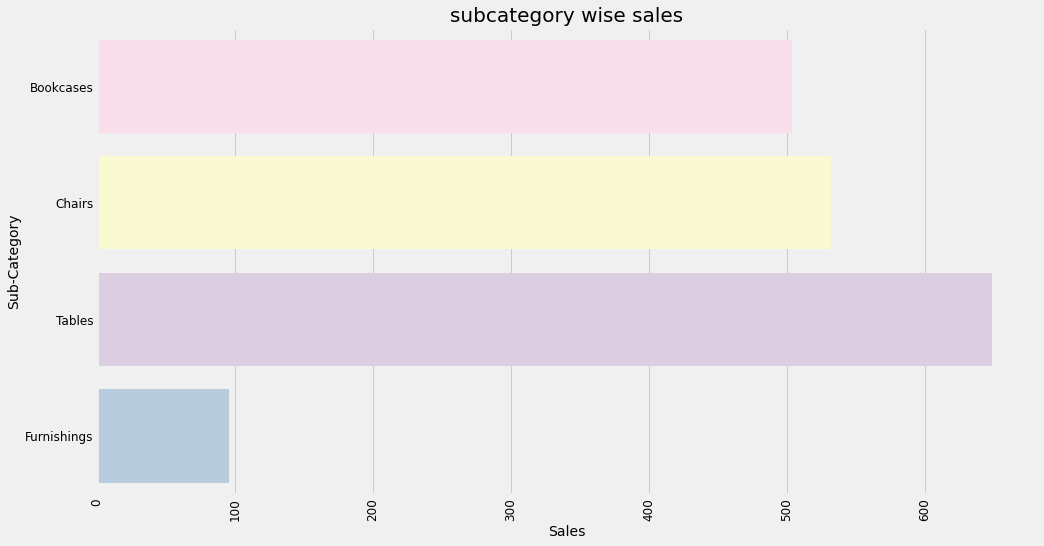

In [118]:
plt.figure(figsize=(15,8))
# Passing X axis and Y axis along with subplot position
plt.title('subcategory wise sales', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = furniture_new['Sales'] , y = furniture_new['Sub-Category'] , palette='Pastel1_r',ci=0);

#### Interpretation :::: 
from the above graph we can say that we are getting highest sells from tables and the least is from furnishings, soo we can maintain this tables range also can improve our sales from bookcase because ads we can see that is also putting good impact on sales .

#### Sub-Category wise Discount

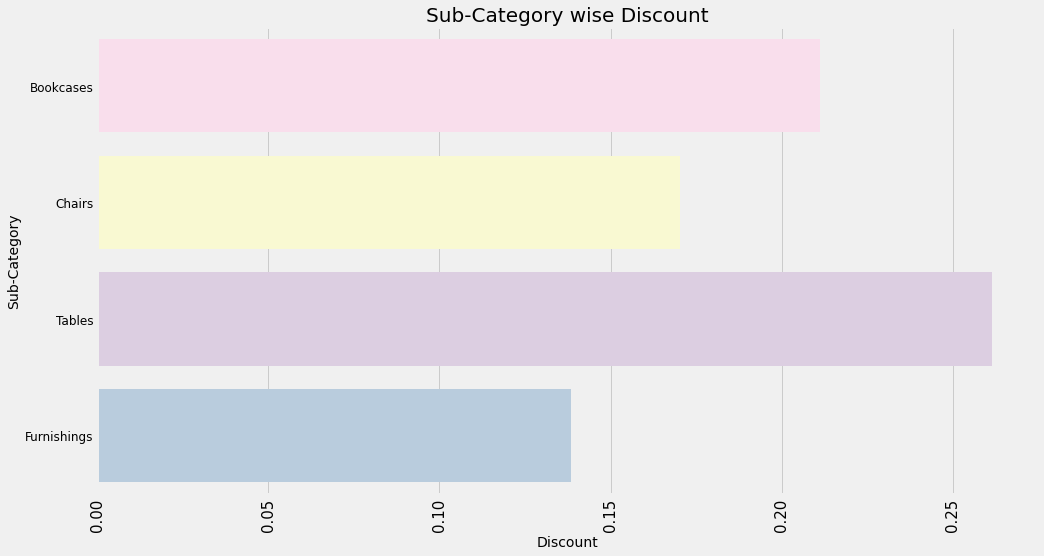

In [117]:
plt.figure(figsize=(15,8))
# Passing X axis and Y axis along with subplot position
plt.title('Sub-Category wise Discount', fontsize = 20)
plt.xticks(rotation=90,fontsize=15)
sns.barplot(x = furniture_new['Discount'] , y = furniture_new['Sub-Category'] , palette='Pastel1_r',ci=0);

#### Interpretation ::::
from the above discount subcategory graph we can say that discount is highest in tabels, and least in furnishings 

#### Sub-Category wise profit

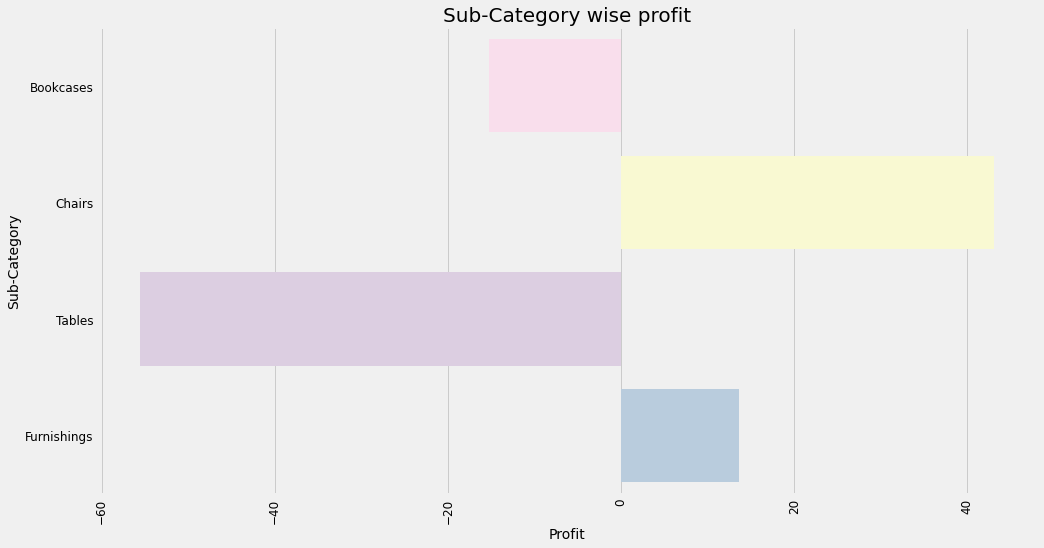

In [109]:
plt.figure(figsize=(15,8))
# Passing X axis and Y axis along with subplot position
plt.title('Sub-Category wise profit', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = furniture_new['Profit'] , y = furniture_new['Sub-Category'] , palette='Pastel1_r',ci=0);

#### Interpretation :::: 
From the above graph we can see that as sales of tables are highest but we are not getting enough amount of profit from it and we are getting loos from that sales , 
chairs are holding highest profit ,and as sales of furnishing is less but sales and profit are parallel to each other .

#### Furniture sales Region Wise

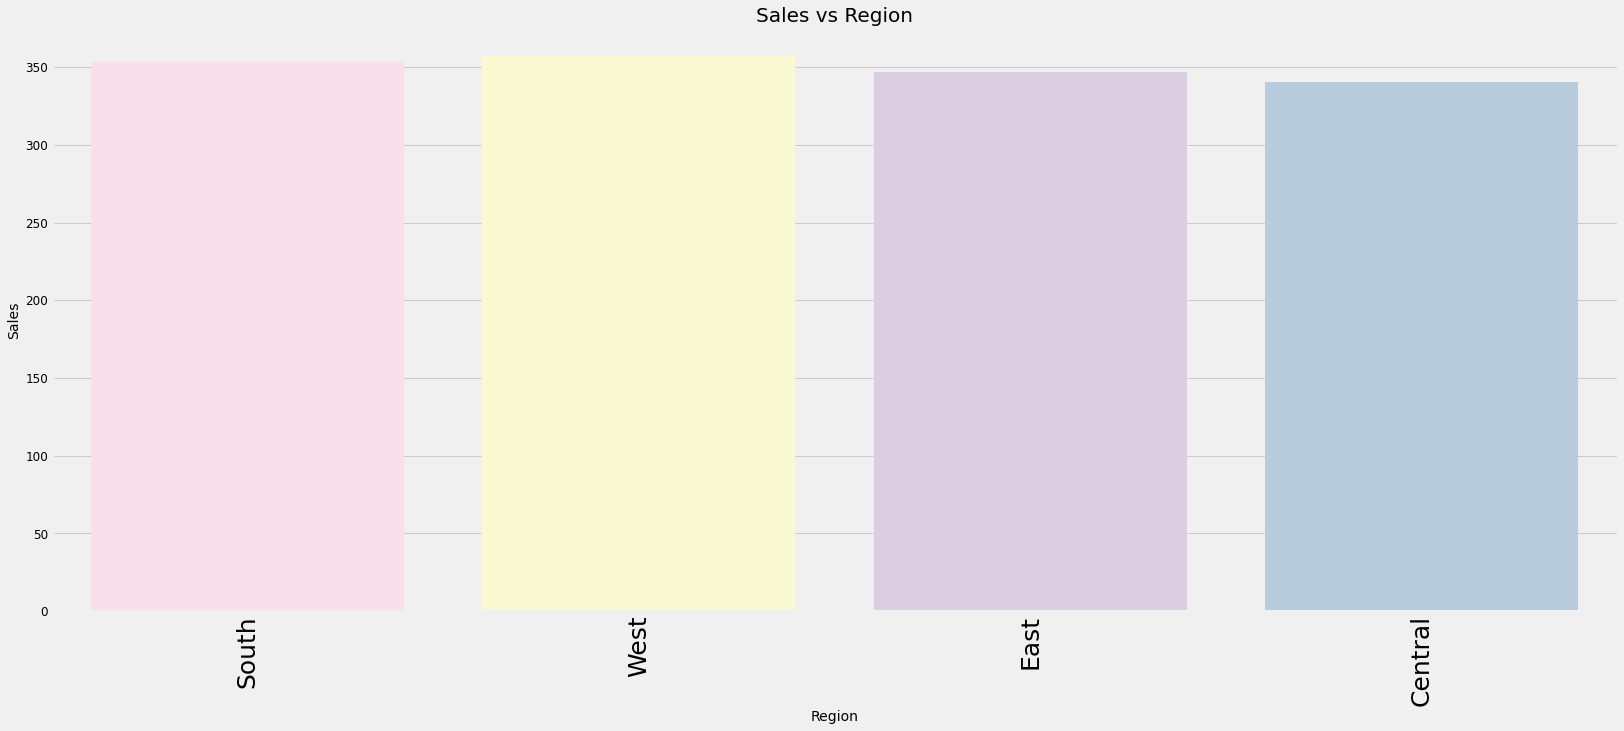

In [136]:
plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
plt.title('Sales vs Region', fontsize = 20)
plt.xticks(rotation=90, fontsize = 25)
sns.barplot(x = furniture_new['Region'] , y = furniture_new['Sales'] , palette='Pastel1_r',ci=0);

#### Interpretation ::::
sales of furniture is almost equall in all region.

#### FAURNITURE SALES VS SEGMENT

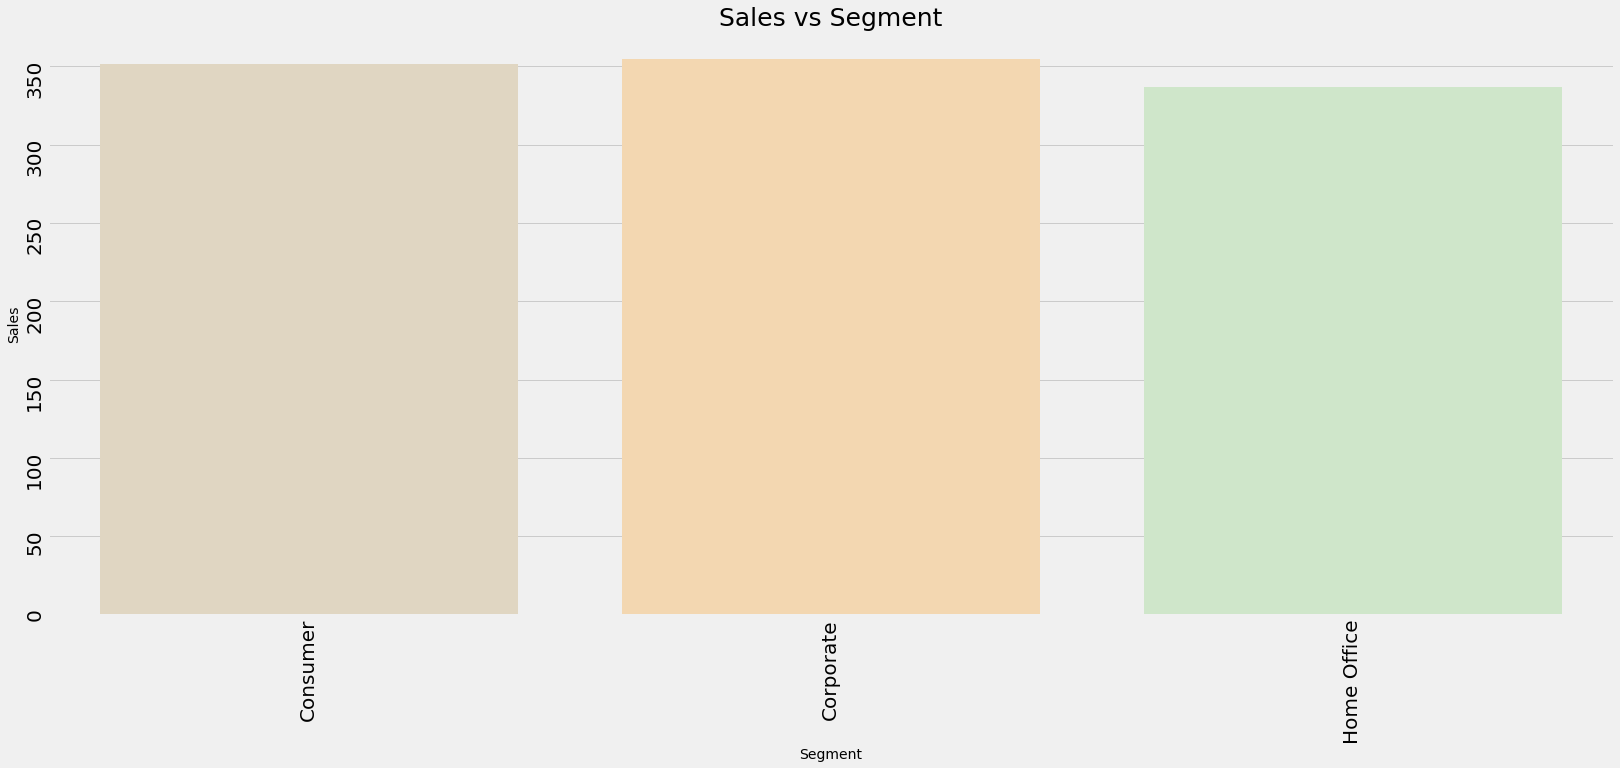

In [137]:
plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
plt.title('Sales vs Segment', fontsize = 25)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=90,fontsize=20)
sns.barplot(x = furniture_new['Segment'] , y = furniture_new['Sales'] , palette='Pastel1_r',ci=0);

#### INTERPRTATION :::::
Furniture sales is almost same in all segments .

#### Interpretation from furniture dataset:::::
After analysisng all the graphs we can conclude that 
we are getting highest sales from tables category but thats because we are providing high discount on that and because of that we are getting highest lose from table sales,second high discount is provided to bookcase and hence we are getting second high lose from bookcase.
best sales from our store is from chair range , where even by not giving too much of discount we are getting highest profit.
As we are already getting good sales from tabel and book case it mean we are having some constant customer for this products soo now we can decrese our discount rate on this products and can increase profit , also we can increase little discount rate on chairs to get better more sales and profit as well form that .


### Indexing with Time Series Data

In [22]:
print('Start date:',furniture_new.index.min()),
print('End date:',furniture_new.index.max())

Start date: 2014-01-06 00:00:00
End date: 2017-12-30 00:00:00


Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

#### Weekly data visualization

In [23]:
weekly_data= df.resample('W').mean() #resampling data as weekly

#### Visually checking the time series for trend and other components

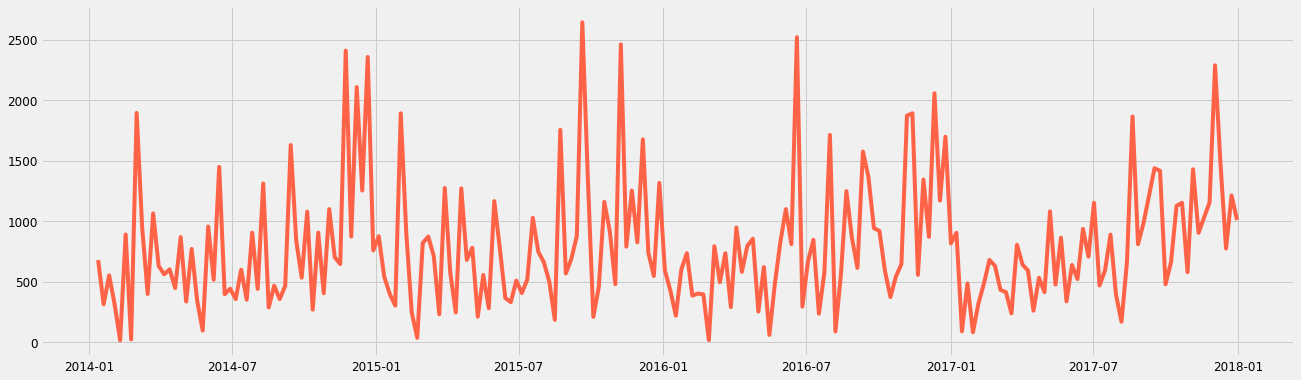

In [24]:
plt.figure(figsize=(20,6))
plt.plot(weekly_data,c='tomato',label='Furniture')
plt.show()

##### Interpretation ::::
The visual show the weekly sales data of 2014 to 2018
The plot clearly indicates that the time series has seasonality pattern. The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

#### Monthly Data visualization

In [25]:
monthly_data = df.resample("M").mean() #resampling data as monthly

#### Visually checking the time series for trend and other components

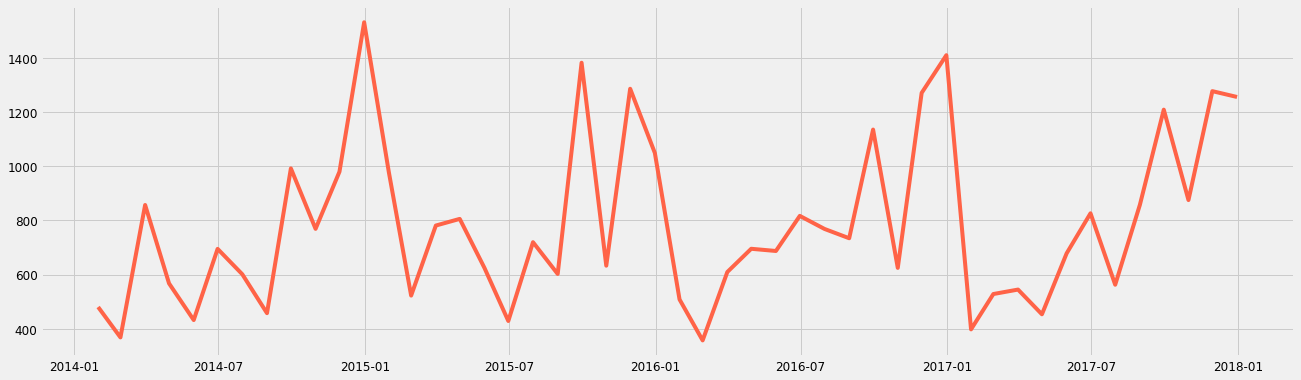

In [26]:
plt.figure(figsize=(20,6))
plt.plot(monthly_data,c='tomato',label='Furniture')
plt.show()

after visualizing weekly and monthly data we can see that we are getting more smooth visualization of monthly data and now we can go to process of decompose this data .

#### Decomposing
Decomposing the time series into three distinct components: trend, seasonality,and noise

##### Monthly Data decompose

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose #to decompose time series data

In [28]:
#time series components
decomp = seasonal_decompose(monthly_data,period = 20)

In [29]:
d_trend = decomp.trend #trend in the data
d_seasonal = decomp.seasonal #seasonality in the data
d_residual = decomp.resid #residuals in the data

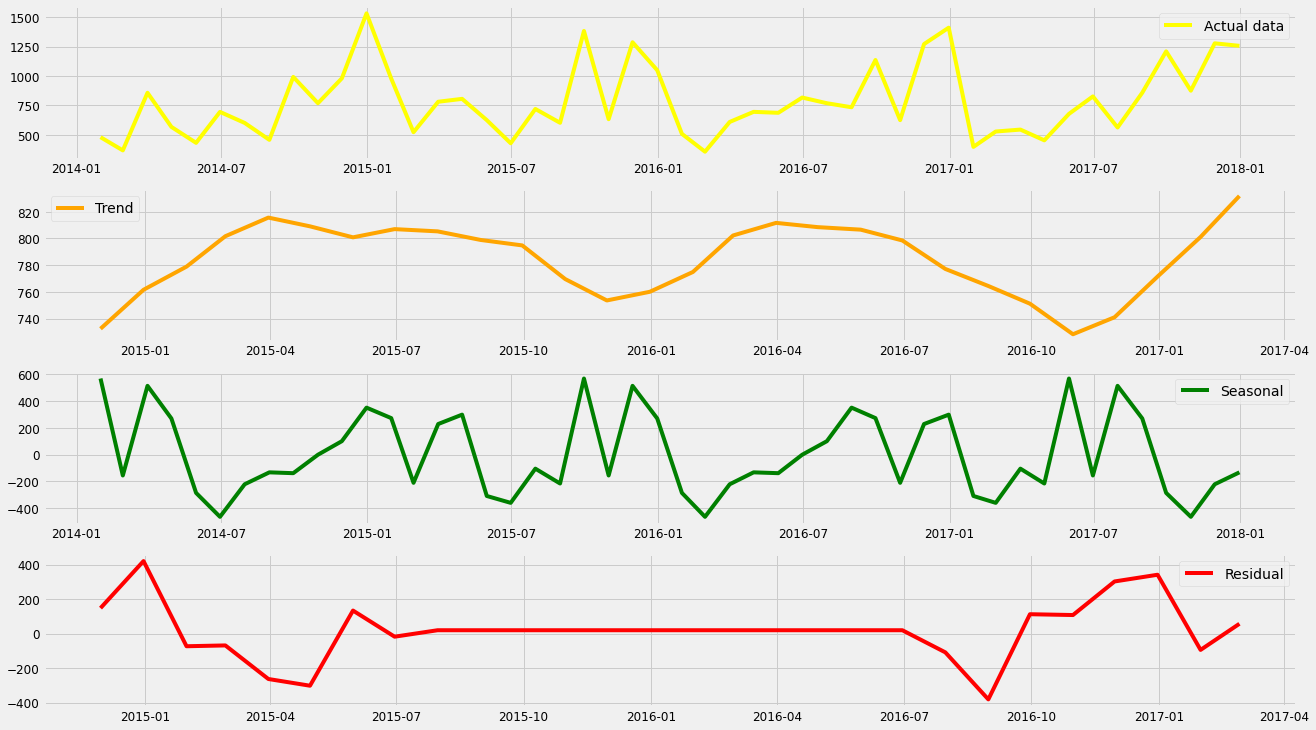

In [30]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(monthly_data,label='Actual data',color='yellow')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend',color='orange')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual',color='red')
plt.legend(loc='best')

plt.show()

#### Decompose of weekly data 

In [31]:
#time series components
decomp = seasonal_decompose(weekly_data,period = 52)

In [32]:
d_trend = decomp.trend #trend in the data
d_seasonal = decomp.seasonal #seasonality in the data
d_residual = decomp.resid #residuals in the data

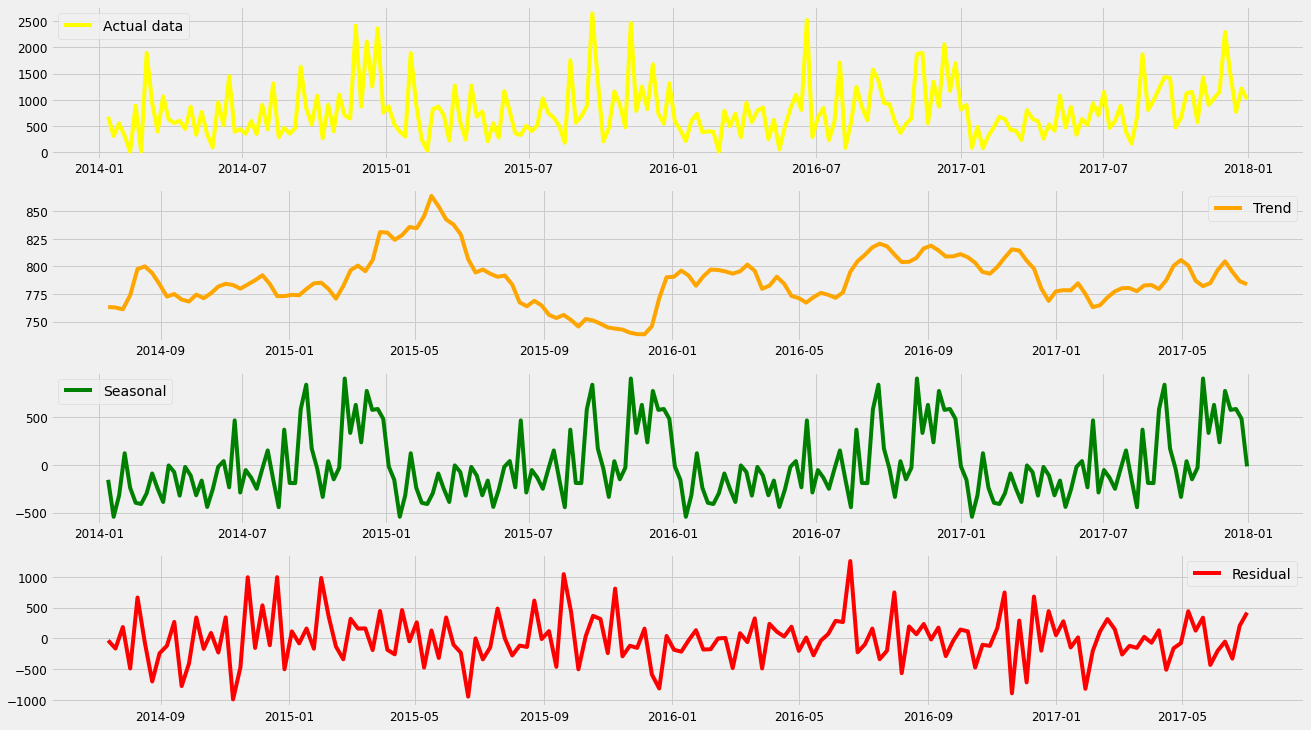

In [33]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(weekly_data,label='Actual data',color='yellow')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend',color='orange')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual',color='red')
plt.legend(loc='best')

plt.show()

##### Interpretation ::::
After seeing both data for monthly and weekly i will go further modling work with weekly data because with that i will get more data points to predict.
By visualizing the decomposition components of the original time series we can say that the sales of furniture is unstable along with its obvious seasonality is also present in the dataset.

### Checking Stationarity of the data

In [34]:
from statsmodels.tsa.stattools import adfuller #for dickey-fuller test

In [35]:
# dickey-fuller test for stationarity
def checkstationarity(data):
    pvalue=adfuller(data)[1] #[1] gives the pvalue from adfuller
    if pvalue< 0.05:
        ret='Data is stationary.Do model building'
    else:
        ret='Data is not stationary.Make the data stationary'
    return(ret)

In [36]:
checkstationarity(weekly_data)#checking the stationarity of the data

'Data is stationary.Do model building'

#### data is stationary we can move towards model building
This suggest that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low propability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggest the time series does not have a unit root, meaning it is stationary.

# Calculate ACF and PACF to get p and q 

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #for acf and pacf 

### ACF and PACF plot for weekly data 

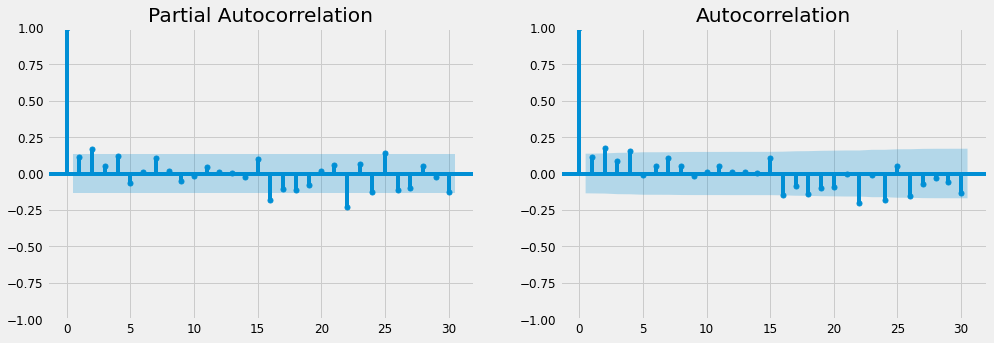

In [38]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plot_pacf(weekly_data ,lags=30,ax=ax[0]);
plot_acf(weekly_data,lags=30,ax = ax[1]);

### ACF and PACF plot for monthly data 

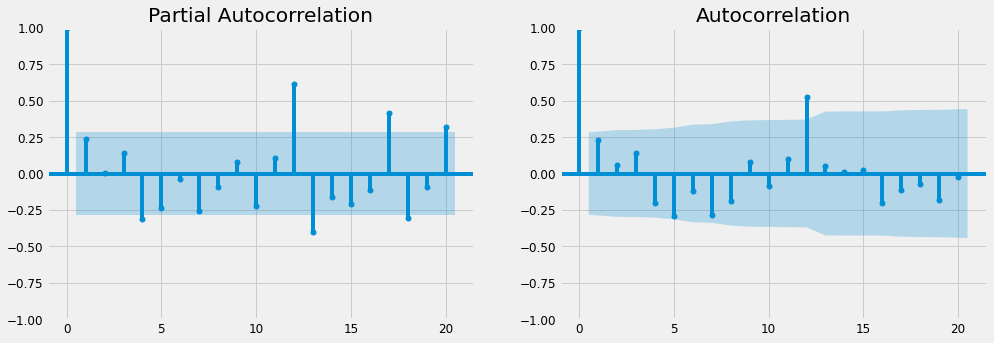

In [39]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plot_pacf(monthly_data ,lags=20,ax=ax[0]);
plot_acf(monthly_data,lags=20,ax = ax[1]);

### interpretation ::::
above is the ACF and PACF plot of weekly and monthly data , 
because i will consider weekly data soo i will take p =3 , q = 4.

In [40]:
#Data Spliting

In [41]:
weekly_data.head()

Order Date
2014-01-12    678.10700
2014-01-19    312.61825
2014-01-26    551.98600
2014-02-02    311.83300
2014-02-09     14.56000
Freq: W-SUN, Name: Sales, dtype: float64

In [42]:
# split the data into train and test
split = int(0.7 * len(weekly_data))

train = weekly_data.iloc[:split] #training
test =  weekly_data.iloc[split:] #testing
print("Train shape = {}, Test shape= {}".format(len(train), len(test))) 

Train shape = 145, Test shape= 63


### Modeling

#### Forcasting by ARIMA Model

###### We are going to apply one of the most commonly used method for time-series forecasting, known as Arima, which stands for Autoregressive Integrated Moving Average.

In [43]:
from statsmodels.tsa.arima.model import ARIMA #library for building the model

In [44]:
#loop for p and q range
li=[] #empty list
for p in range(3):
    for q in range(4):
        li.append((p,0,q))

In [45]:
li

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3)]

In [46]:
#loop for models
model=[] #empty list
for i in li:
    m=ARIMA(train,order=i).fit()
    model.append(m)

In [47]:
from sklearn.metrics import mean_squared_error #for calculating errors

aic = [] #empty list
bic = []  #empty list
MSE = [] #empty list
RMSE = [] #empty list

for i in model:
    aic.append(i.aic) #appending aic
    bic.append(i.bic) #appending bic 
    forecast = i.fittedvalues #forecasting predictions
    mse = mean_squared_error(train, forecast) #calculating mse
    rmse= mean_squared_error(train, forecast,squared= False)#calculating rmse
    MSE.append(mse) #appending mse
    RMSE.append(rmse) #appending rmse

In [48]:
f= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = li) #final datafrrame of loop values
f

AIC          BIC            MSE        RMSE
(0, 0, 0)  2230.956131  2236.909599  273878.834028  523.334342
(0, 0, 1)  2232.959491  2241.889692  273846.555509  523.303502
(0, 0, 2)  2233.037785  2244.944720  270231.322496  519.837785
(0, 0, 3)  2234.073888  2248.957556  268421.219216  518.093832
(1, 0, 0)  2232.938235  2241.868436  273838.521570  523.295826
(1, 0, 1)  2233.142550  2245.049485  270442.553664  520.040915
(1, 0, 2)  2233.694396  2248.578065  267714.695545  517.411534
(1, 0, 3)  2235.678405  2253.538808  267676.570416  517.374691
(2, 0, 0)  2232.682300  2244.589235  269570.872408  519.202150
(2, 0, 1)  2233.701322  2248.584990  267676.940156  517.375048
(2, 0, 2)  2235.663885  2253.524288  267658.671352  517.357392
(2, 0, 3)  2237.506719  2258.343855  267357.128651  517.065884

In [49]:
min_aic = f['AIC'].idxmin() #calculating min value
min_bic = f['BIC'].idxmin()#calculating min value
min_mse = f['MSE'].idxmin()#calculating min value
min_rmse =f['RMSE'].idxmin()#calculating min value

print('min_aic:',min_aic)
print('min_bic:',min_bic)
print('min_mse:',min_mse)
print('min_rmse:',min_rmse)

min_aic: (0, 0, 0)
min_bic: (0, 0, 0)
min_mse: (2, 0, 3)
min_rmse: (2, 0, 3)


Using the for loop we got the order = (2,0,3) that has mininmum errors. We will make model as per this values.

#### Model Building

In [50]:
arima_model = ARIMA(train,order=(4,0,2)).fit() #creating the final model

In [51]:
arima_model.summary() #model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  145
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1111.334
Date:                Mon, 14 Nov 2022   AIC                           2238.668
Time:                        19:53:36   BIC                           2262.481
Sample:                    01-12-2014   HQIC                          2248.344
                         - 10-16-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        757.7151     80.181      9.450      0.000     600.562     914.868
ar.L1         -0.3456      0.797     -0.434      0.665      -1.908       1.217
ar.L2          0.7286      0.738      0.987      0.324      -0.719       2.176
ar.L3          0.1136      0.200      0.567      0.571      -0.279       0.506
ar.L4         -0.0338      0.193     -0.175      0.861      -0.411       0.344
ma.L1          0.3527      0.763      0.462      0.644      -1.144       1.849
ma.L2         -0.6162      0.732     -0.842      0.400      -2.051       0.818
sigma2      2.612e+05    2.9e+04      9.019      0.000    2.04e+05    3.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                76.50
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             1.40
Prob(H) (two-sided):                  0.83   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
import statsmodels.api as sm #for checking model goodness
pvalue = sm.stats.acorr_ljungbox(arima_model.resid,lags=[30],return_df=True)['lb_pvalue'].values 

if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


#### Forcasting Sales

In [53]:
train_fcast = arima_model.fittedvalues #predictions of the train data
train_fcast

Order Date
2014-01-12    757.715111
2014-01-19    756.750254
2014-01-26    743.075398
2014-02-02    696.275462
2014-02-09    697.110062
                 ...    
2016-09-18    831.415269
2016-09-25    781.530142
2016-10-02    962.005761
2016-10-09    763.539053
2016-10-16    898.850815
Freq: W-SUN, Length: 145, dtype: float64

In [54]:
arima_forecast = arima_model.forecast(len(test)) #prediction of the test data
arima_forecast

2016-10-23    701.991725
2016-10-30    796.015414
2016-11-06    665.742919
2016-11-13    824.093692
2016-11-20    674.003569
                 ...    
2017-12-03    753.459269
2017-12-10    761.749701
2017-12-17    753.890266
2017-12-24    761.341111
2017-12-31    754.277615
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

### Visualization of train and test forecast.

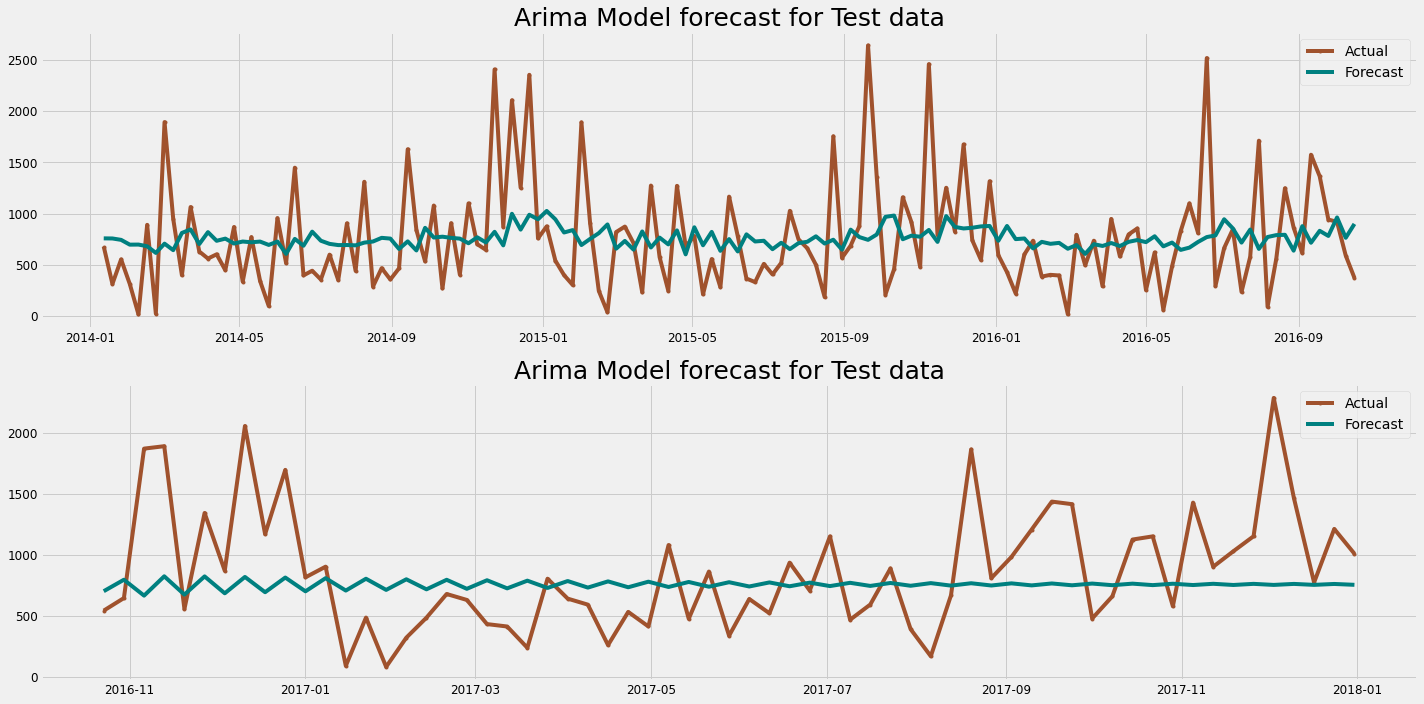

In [55]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title('Arima Model forecast for Test data',fontsize=25)
plt.plot(train,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(train_fcast ,color = 'teal' , label = 'Forecast' )
plt.legend()

plt.subplot(2,1,2)
plt.title('Arima Model forecast for Test data',fontsize=25)
plt.plot(test,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(arima_forecast,color = 'teal' , label = 'Forecast' )
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
#errors

In [57]:
arima_mse = mean_squared_error(test,arima_forecast)
arima_rmse = mean_squared_error(test,arima_forecast,squared=False)

print('MSE :',arima_mse)
print('RMSE :',arima_rmse)

MSE : 248323.58658975025
RMSE : 498.3207667654944


In [58]:
arima_aic = arima_model.aic
arima_bic = arima_model.bic

print('AIRMA aic:',arima_aic)
print('AIRMA bic:',arima_bic)

AIRMA aic: 2238.6676194213615
AIRMA bic: 2262.481489360726


#### Forcasting using SARIMA model

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
#for sarima and sarimax modelling
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset

In [60]:
p=2; q=3; d=1
sarima_model = sm.tsa.statespace.SARIMAX(train,order=(4,0,2),seasonal_order=(1,0,2,52)).fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(4, 0, 2)x(1, 0, 2, 52)   Log Likelihood               -1114.161
Date:                            Mon, 14 Nov 2022   AIC                           2248.322
Time:                                    19:53:50   BIC                           2278.090
Sample:                                01-12-2014   HQIC                          2260.418
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0118      0.105     -0.113      0.910      -0.218       0.194
ar.L2          1.1106      0.074   

In [61]:
pvalue = sm.stats.acorr_ljungbox(sarima_model.resid,lags=[30],return_df=True)['lb_pvalue'].values 

if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


In [62]:
sarima_train_fcast = sarima_model.fittedvalues #predictions of the train data
sarima_train_fcast

Order Date
2014-01-12       0.000000
2014-01-19     424.477302
2014-01-26     423.905110
2014-02-02     408.619764
2014-02-09     415.905296
                 ...     
2016-09-18    1071.778283
2016-09-25     843.617335
2016-10-02     819.164480
2016-10-09     621.473323
2016-10-16     929.808325
Freq: W-SUN, Length: 145, dtype: float64

In [63]:
sarima_forecast = sarima_model.forecast(len(test))
sarima_forecast

2016-10-23    682.145986
2016-10-30    756.753604
2016-11-06    909.610709
2016-11-13    833.735838
2016-11-20    842.719636
                 ...    
2017-12-03    707.963476
2017-12-10    749.855750
2017-12-17    583.493260
2017-12-24    839.953650
2017-12-31    699.720737
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

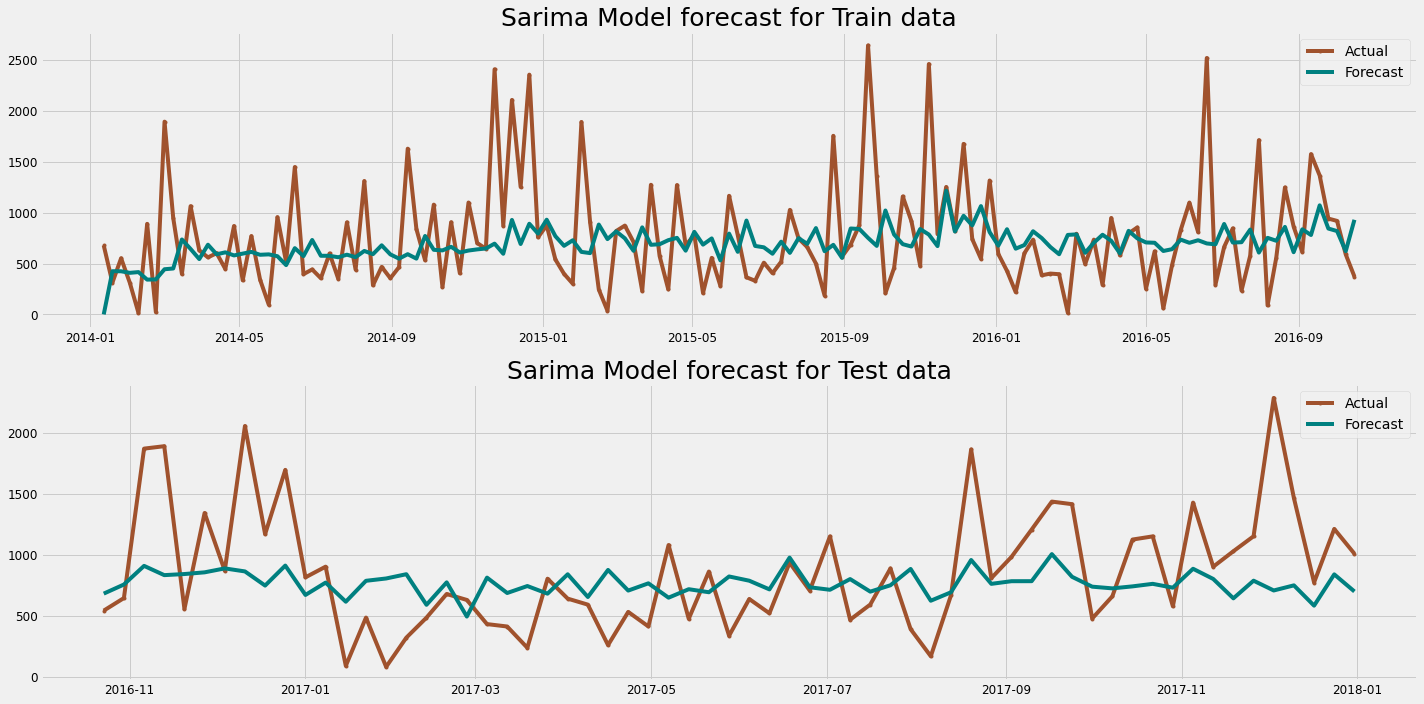

In [64]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title('Sarima Model forecast for Train data',fontsize=25)
plt.plot(train,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarima_train_fcast ,color = 'teal' , label = 'Forecast' )
plt.legend()

plt.subplot(2,1,2)
plt.title('Sarima Model forecast for Test data',fontsize=25)
plt.plot(test,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarima_forecast,color = 'teal' , label = 'Forecast' )
plt.legend()

plt.tight_layout()
plt.show()

### Interpretation::::

The above visual shows the training and the test forecast of sarima model and we can observe that the sarima model is able to predict slightly better as seasonality is present in the dataset and it is able to detect it partially.

In [65]:
#errors

In [66]:
sarima_mse = mean_squared_error(test,sarima_forecast)
sarima_rmse = mean_squared_error(test,sarima_forecast,squared=False)

print('MSE :',sarima_mse)
print('RMSE :',sarima_rmse)

MSE : 224118.80851143858
RMSE : 473.41188040800006


In [67]:
sarima_aic = sarima_model.aic
sarima_bic = sarima_model.bic

print('sarima aic:',sarima_aic)
print('sarima bic:',sarima_bic)

sarima aic: 2248.3222690457874
sarima bic: 2278.089606469993


### Forcasting with SARIMAX

In [68]:
sarimax_df = furniture.groupby(['Order Date'])["Discount"].sum()
sarimax_df.head(3)

Order Date
2014-01-03    0.2
2014-01-04    1.2
2014-01-05    0.2
Name: Discount, dtype: float64

In [69]:
weekly_data_2 = sarimax_df.resample("W").mean()

In [70]:
weekly_data_2

Order Date
2014-01-05    0.533333
2014-01-12    0.360000
2014-01-19    0.841667
2014-01-26    0.250000
2014-02-02    0.241667
                ...   
2017-12-03    3.142857
2017-12-10    2.157143
2017-12-17    1.708333
2017-12-24    1.792857
2017-12-31    2.103333
Freq: W-SUN, Name: Discount, Length: 209, dtype: float64

In [71]:
weekly_data_2.shape

(209,)

In [72]:
split = int(0.7*len(weekly_data_2))
train_d = weekly_data_2.iloc[:split-1]
test_d = weekly_data_2.iloc[split:]
print("train = {}, test = {}".format(len(train_d),len(test_d)))

train = 145, test = 63


In [73]:
train.shape

(145,)

In [74]:
sarimax_model = SARIMAX(train, order=(2,0,3),seasonal_order=(1,0,1,52),exog=train_d.values).fit()

In [75]:
pvalue = sm.stats.acorr_ljungbox(sarimax_model.resid,lags=[1],return_df=True)['lb_pvalue'].values 

if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


In [76]:
sarimax_train_fcast2 = sarimax_model.fittedvalues #predictions of the train data
sarimax_train_fcast2

Order Date
2014-01-12     336.658015
2014-01-19     144.968000
2014-01-26     525.809030
2014-02-02     134.055074
2014-02-09     114.956571
                 ...     
2016-09-18    2084.757986
2016-09-25     502.305639
2016-10-02    1234.798336
2016-10-09     911.358730
2016-10-16     652.556091
Freq: W-SUN, Length: 145, dtype: float64

In [77]:
sarimax_forecast = sarimax_model.forecast(len(test_d), exog=test_d.values)

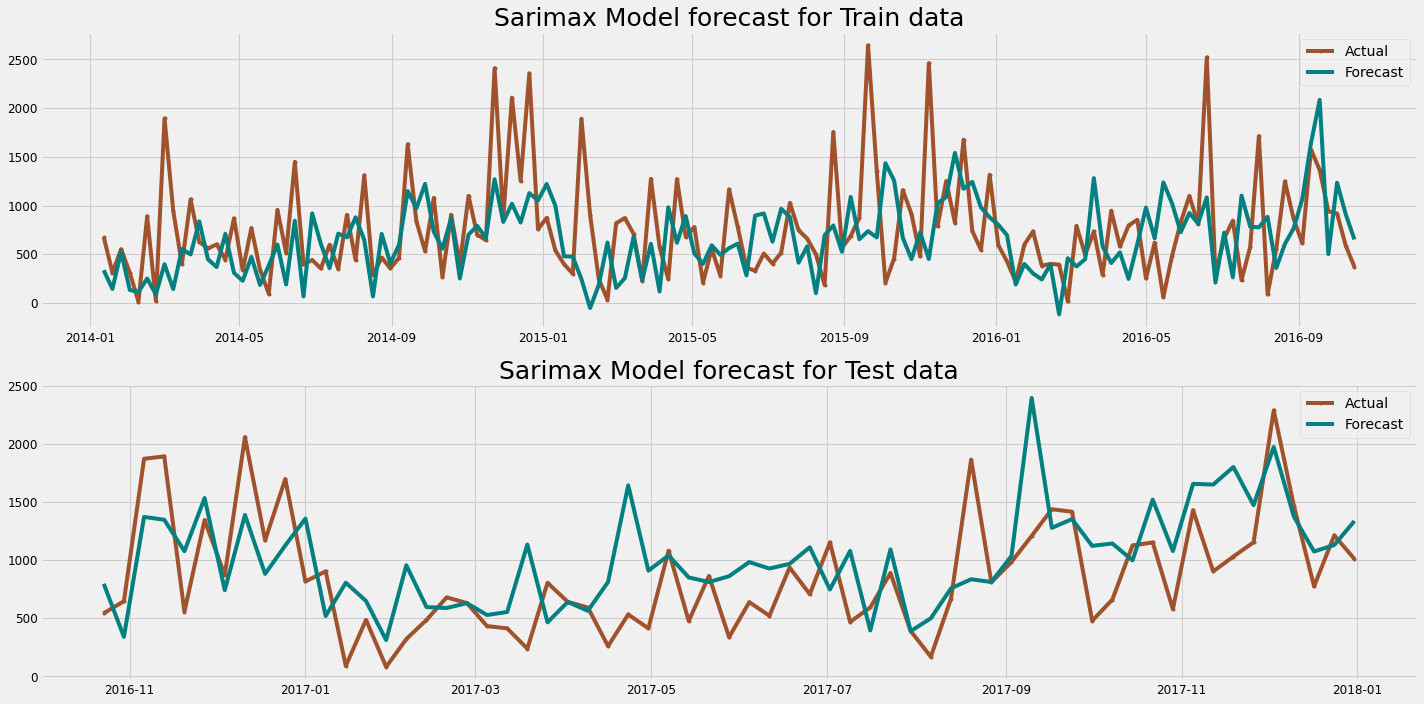

In [78]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title('Sarimax Model forecast for Train data',fontsize=25)
plt.plot(train,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarimax_train_fcast2 ,color = 'teal' , label = 'Forecast' )
plt.legend()

plt.subplot(2,1,2)
plt.title('Sarimax Model forecast for Test data',fontsize=25)
plt.plot(test,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarimax_forecast,color = 'teal' , label = 'Forecast' )
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
#errors

In [80]:
sarimax_mse = mean_squared_error(test,sarimax_forecast)
sarimax_rmse = mean_squared_error(test,sarimax_forecast,squared=False)

print('MSE :',sarimax_mse)
print('RMSE :',sarimax_rmse)

MSE : 203720.62475658412
RMSE : 451.35421207360423


In [81]:
sarimax_aic = sarimax_model.aic
sarimax_bic = sarimax_model.bic

print('sarimax aic:',sarimax_aic)
print('sarimax bic:',sarimax_bic)

sarimax aic: 2262.5039524573513
sarimax bic: 2289.2945561391366


## Final interpretation

In [82]:
final = pd.DataFrame([[arima_mse,arima_rmse,arima_aic,arima_bic],
                      [sarima_mse,sarima_rmse,sarima_aic,sarima_bic],
                      [sarimax_mse,sarimax_rmse,sarimax_aic,sarimax_bic]],
                     columns=['Mse','RMSE','AIC','BIC'],index=['Arima model','sarima model','Sarimax model'])

In [83]:
final

Mse        RMSE          AIC          BIC
Arima model    248323.586590  498.320767  2238.667619  2262.481489
sarima model   224118.808511  473.411880  2248.322269  2278.089606
Sarimax model  203720.624757  451.354212  2262.503952  2289.294556

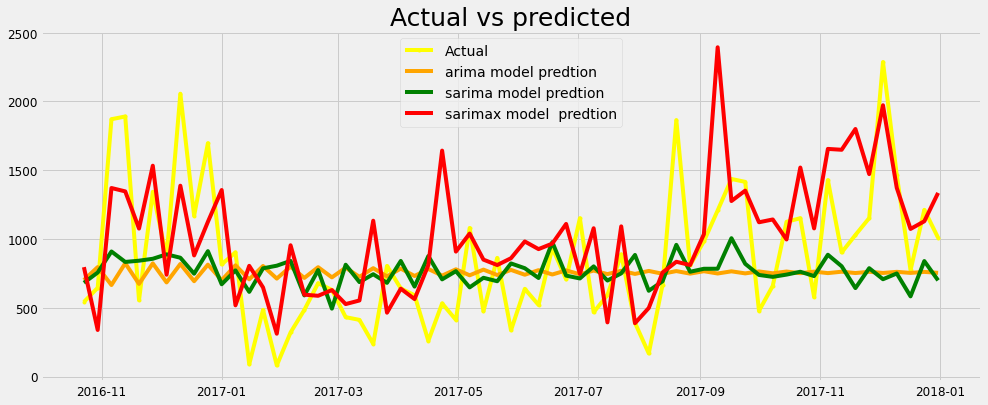

In [84]:
plt.figure(figsize=(15,6))


plt.title('Actual vs predicted',fontsize=25)
plt.plot(test,marker = '.', color = 'yellow' , label = 'Actual')
plt.plot(arima_forecast ,color = 'orange' , label = 'arima model predtion' )
plt.plot(sarima_forecast ,color = 'green' , label = 'sarima model predtion' )
plt.plot(sarimax_forecast ,color = 'red' , label = 'sarimax model  predtion' )
plt.legend()
plt.show()

#### Interpretation::::
After visualization and erros values of all the models , my interpretation is sarimax model is giving me less erros also visualization of sarimax model is better , so i iwll keep this model for future sales forcastination of furniture sales.
